In [2]:
import scipy.stats as sts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# техническое извлечение таблиц
df_spb = pd.read_csv('fixed_spb_1', sep=',')
df_moscow = pd.read_csv('fixed_moscow_1', sep=',')

df_spb.rename(columns={'Unnamed: 0': 'Дата'}, inplace=True)
df_spb.set_index('Дата', inplace=True)
df_spb.index = pd.to_datetime(df_spb.index)
df_moscow.rename(columns={'Unnamed: 0': 'Дата'}, inplace=True)
df_moscow.set_index('Дата', inplace=True)
df_moscow.index = pd.to_datetime(df_moscow.index)

In [4]:
# создадим новые переменные - идеи тут довольно очевидные

# перепад температур - показатель того, насколько климат резкий и переменчивый
df_spb['Перепад температур'] = df_spb['Дневная температура'] - df_spb['Ночная температура']
df_moscow['Перепад температур'] = df_moscow['Дневная температура'] - df_moscow['Ночная температура']

# альтернатива месяцу как категориальному признаку - время года; one hot encoding с ним будет давать меньшие матрицы
# но время года менее информативно и его легко вытащить из месяцев, так что пусть будет месяц 
df_spb['Месяц'] = df_spb.index.month
df_moscow['Месяц'] = df_moscow.index.month

# сохраним получившиеся таблицы: 
df_spb.to_csv('spb_final')
df_moscow.to_csv('moscow_final')

## 1. Круговая диаграмма погодных явлений

In [5]:
# для построения круговой диаграммы
spb_conds_types = df_spb['Погодные явления'].value_counts().sort_index().index
spb_conds_vols = df_spb['Погодные явления'].value_counts().sort_index().values

moscow_conds_types = df_moscow['Погодные явления'].value_counts().sort_index().index
moscow_conds_vols = df_moscow['Погодные явления'].value_counts().sort_index().values

<function matplotlib.pyplot.show(close=None, block=None)>

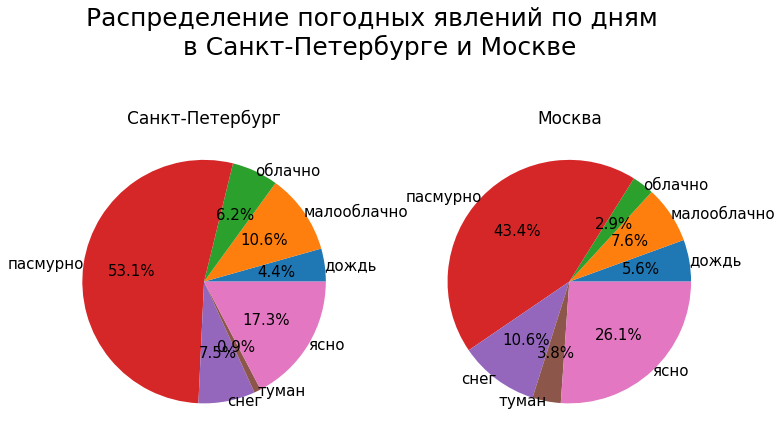

In [107]:
fig = plt.figure(1, figsize=(12, 8))
fig.suptitle("Распределение погодных явлений по дням \n в Санкт-Петербурге и Москве", fontsize=25)
ax1 = plt.subplot(1, 2, 1)
plt.pie(spb_conds_vols, labels=spb_conds_types, autopct='%.1f%%', 
        labeldistance=1, textprops={'fontsize': 15})
ax1.set_title("Санкт-Петербург", fontdict={'fontsize': 17})
ax2 = plt.subplot(1, 2, 2)
plt.pie(moscow_conds_vols, labels=moscow_conds_types, autopct='%.1f%%', 
        labeldistance=1, textprops={'fontsize': 15})
ax2.set_title("Москва", fontdict={'fontsize': 17})
plt.show

In [ ]:
# Питер явно более мрачный, чем Москва
# хотя переменная "дождь" здесь явно сломана (тот случай, когда хотелось бы видеть осадки в мм), вывод от этого не меняется

## 2. График дневной температуры за конкретный год

<function matplotlib.pyplot.show(close=None, block=None)>

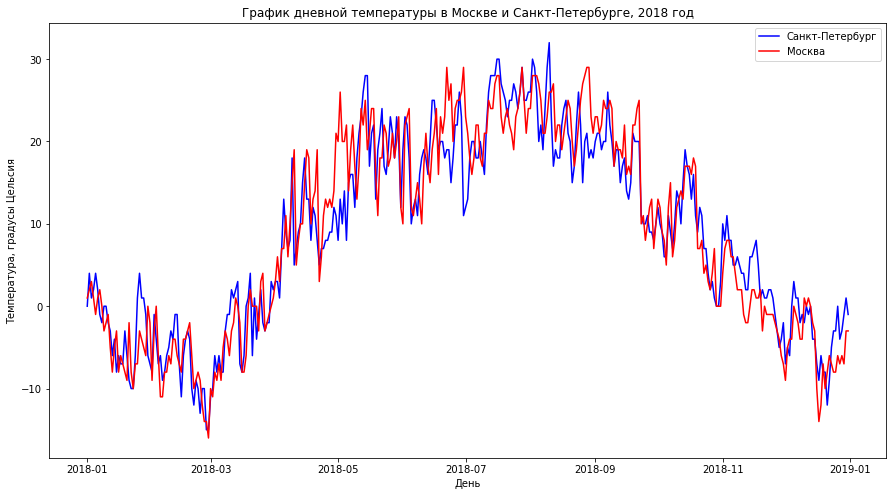

In [103]:
# посмотрим на динамику температуры в какой-нибудь из годов

fig = plt.figure(2, figsize=(15, 8))
ax1 = plt.plot(df_spb.loc['01-01-2018':'31-12-2018', 'Дневная температура'], color='b')
ax2 = plt.plot(df_moscow.loc['01-01-2018':'31-12-2018', 'Дневная температура'], color='r')
plt.title('График дневной температуры в Москве и Санкт-Петербурге, 2018 год')
plt.xlabel('День')
plt.ylabel('Температура, градусы Цельсия')
plt.legend(('Санкт-Петербург', 'Москва'))
plt.show

### Тут починили выбросы!

In [ ]:
# в предыдущей версии описывал проблемы с выбросом в январе - починил эту проблему

# еще надо подумать над идеей более информативной визуализации, потому что здесь никаких особых выводов сделать не получится 
# НО! хороший материал для проверки гипотезы - "Дневная температура в Москве превышает дневную температуру в СПб"

## 3. Роза ветров

источники:

гайд по использованию модуля - https://hatarilabs.com/ih-en/how-to-make-a-wind-rose-with-python-tutorial

для построения графиков - https://stackoverflow.com/questions/57027970/subplots-in-windrose-diagram

In [105]:
from windrose import WindroseAxes

# переведем направления ветра в градусы, чтобы модуль корректно построил график 

wind_replacement = {'Восточный': 90, 'Северо-восточный': 45, 'Северный': 0, 'Северо-западный': 315, 
 'Западный': 270, 'Юго-западный': 225, 'Южный': 180, 'Юго-восточный': 135}

spb_wind_dir = df_spb['Направление ветра'].rename('В градусах').replace(wind_replacement)
moscow_wind_dir = df_moscow['Направление ветра'].rename('В градусах').replace(wind_replacement)

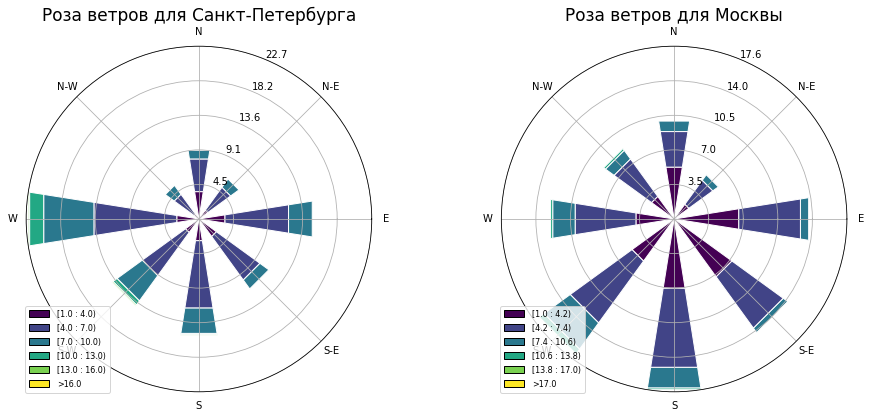

In [101]:
# матплотлиб не воспринимает розу ветров через subplots, поэтому пользуемся костылями из второго источника

fig=plt.figure()

rect=[0.1, 0, 1.5, 1.2] 
spb=WindroseAxes(fig, rect)
fig.add_axes(spb)
spb.bar(spb_wind_dir, df_spb['Сила ветра'], normed=True, opening=0.8, edgecolor='white')
spb.set_legend()
spb.set_title("Роза ветров для Санкт-Петербурга", fontdict={'fontsize': 17})

rect1=[1.2, 0, 1.5, 1.2]
moscow=WindroseAxes(fig, rect1)
fig.add_axes(moscow)
moscow.bar(moscow_wind_dir, df_moscow['Сила ветра'], normed=True, opening=0.8, edgecolor='white')
moscow.set_legend()
moscow.set_title("Роза ветров для Москвы", fontdict={'fontsize': 17})

plt.show()

In [106]:
# Санкт-Петербург в основном продувает с запада, а Москву - с Юго-Запада и Юга; 
# командой value_counts() могли бы прийти к аналогичным выводам, но без информации о силе ветра
# при этом в Москве сильный ветер дует чут реже, чем в СПб 

df_spb['Направление ветра'].value_counts()

Направление ветра
Западный            482
Южный               328
Восточный           321
Юго-западный        301
Юго-восточный       242
Северный            194
Северо-восточный    140
Северо-западный     116
Name: count, dtype: int64

## 4. Диаграмма рассеяния 

Из школьных уроков географии известно, что между температурой и влажностью есть связь (правда, довольно сложная).

Посмотрим, есть ли что-нибудь попроще. 

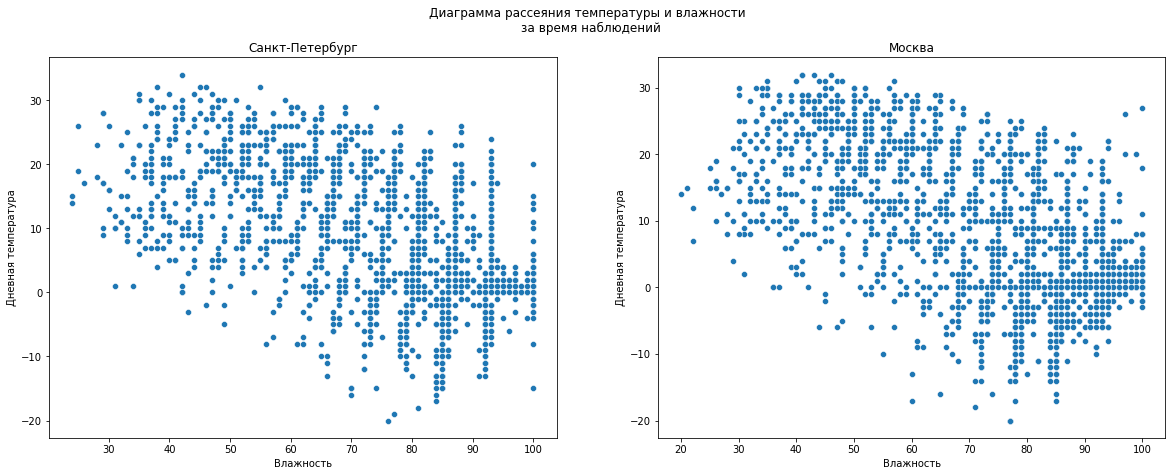

In [242]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7)) 
fig.suptitle('Диаграмма рассеяния температуры и влажности \n за время наблюдений')

spb = sns.scatterplot(ax=axes[0], data=df_spb, x='Влажность', y='Дневная температура')
spb.set(title='Санкт-Петербург')

moscow = sns.scatterplot(ax=axes[1], data=df_moscow, x='Влажность', y='Дневная температура')
moscow.set(title='Москва')

plt.show()

Можно видеть слабую отрицательную взаимосвязь.

Графики похожи, но для Москвы ситуация "минус и влажно" встречается чаще, чем у Петербурга.

In [127]:
# для усредненного значения по годам комфортнее убрать 29 февраля - тогда размерности везде будут совпадать
# какой год високосный?
years = pd.date_range(start='2017', end='2023', freq='Y')
years[years.is_leap_year].year

# уберем 29 февраля
df_spb.drop(index='29-02-2020', axis=1, inplace=True)
df_moscow.drop(index='29-02-2020', axis=1, inplace=True)

Index([2020], dtype='int32')

Следующая задача: составить массив данных, где на каждый день абстрактного года у нас будут усредненные показатели для этого дня по всем годам наблюдения (e. g. для первого июля 2018, 2019, 2020 и далее годов).
    


In [262]:
# готовим "скелет" будущего массива для обоих городов

df_spb_av = pd.DataFrame(columns=df_spb.columns, index=np.arange(1, 366, 1))
df_spb_av.index.rename('День', inplace=True)

df_moscow_av = pd.DataFrame(columns=df_spb.columns, index=np.arange(1, 366, 1))
df_moscow_av.index.rename('День', inplace=True)

years = np.arange(2018, 2023, 1) # полностью наблюдаемые года

In [257]:
# чтобы не забивать две ячейки одинаковым кодом - оберну в функцию

def average_func(years, df_city, df_city_av): # годы, исходный массив для города, усредненный массив для города
    # массив-костыль, куда будут сохраняться значения признаков для вычисления среднего
    crunch = pd.DataFrame(index=np.arange(1, 366, 1)) 
    city = df_city.copy() # чтобы не было ошибок с chained assignment 
    for column in city:
        for year in years:
            # забиваем в массив-костыль значения признака по интересующим нас годам
            crunch[f'{year}'] = city.loc[f'{year}', f'{column}'].to_numpy()
        # для относительно разреженных числовых переменных   
        if city[f'{column}'].dtype == 'float64':
            df_city_av[f'{column}'] = crunch.mean(axis=1).copy()
        # для менее разреженных категориальных   
        else:
            df_city_av[f'{column}'] = crunch.mode(axis=1)[0].copy()

In [263]:
# сохранили результаты в ранее созданные массивы для обоих городов
average_func(years, df_spb, df_spb_av)
average_func(years, df_moscow, df_moscow_av)

## 5. Усредненный график перепада температур

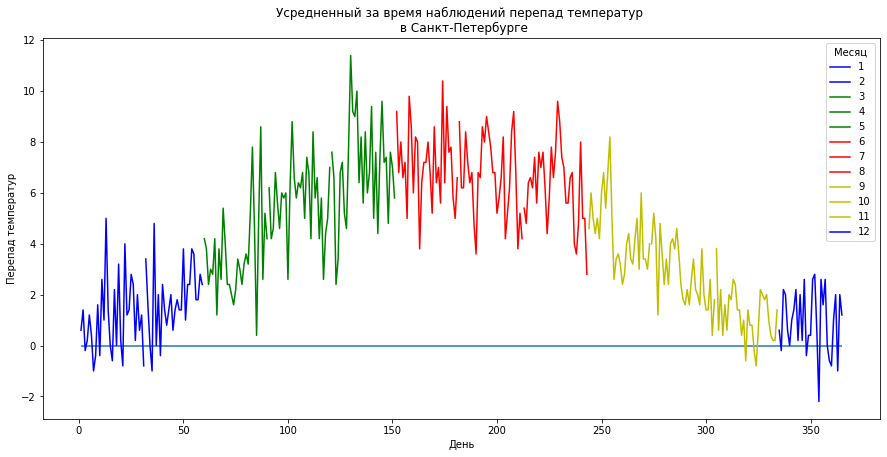

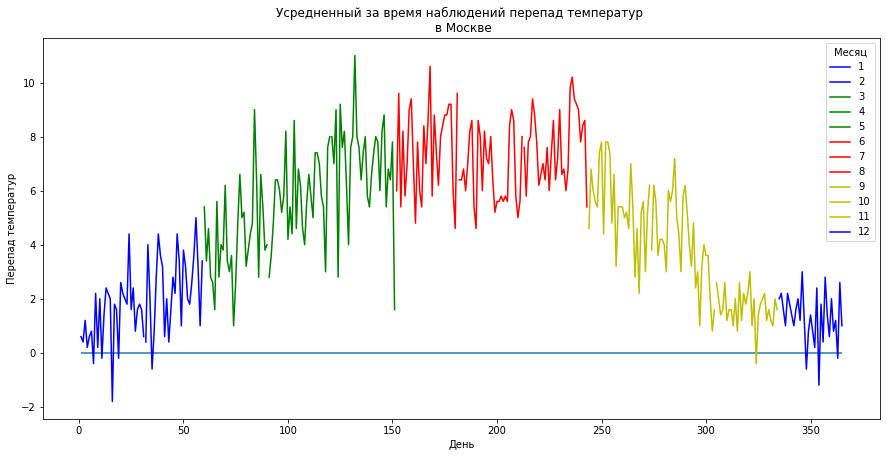

In [279]:
# графически задаем времена года, в очевидном порядке зима-весна-лето-осень-зима
dict_palette = {1: 'b', 2: 'b', 3: 'g',
              4: 'g', 5: 'g', 6: 'r',
              7: 'r', 8: 'r', 9: 'y',
              10: 'y', 11: 'y', 12: 'b'}

figure = plt.figure(figsize=(15, 7))
plt.title('Усредненный за время наблюдений перепад температур \n в Санкт-Петербурге')
plt.hlines(y=0, xmin=1, xmax=365)
figure = sns.lineplot(data=df_spb_av, y='Перепад температур', x=df_spb_av.index, hue='Месяц', legend='full', 
                      palette=dict_palette)

figure = plt.figure(figsize=(15, 7))
plt.title('Усредненный за время наблюдений перепад температур \n в Москве')
plt.hlines(y=0, xmin=1, xmax=365)
figure = sns.lineplot(data=df_moscow_av, y='Перепад температур', x=df_moscow_av.index, hue='Месяц', legend='full', 
                      palette=dict_palette)

Тут видим, что в Санкт-Петербурге перепады чуть более резкие (по абсолютным значениям).
Для обоих городов ситуация "ночью теплее, чем днем" бывает только зимой и поздней осенью. 

## 6. Усредненный график разницы дневных температур Москвы и Петербурга

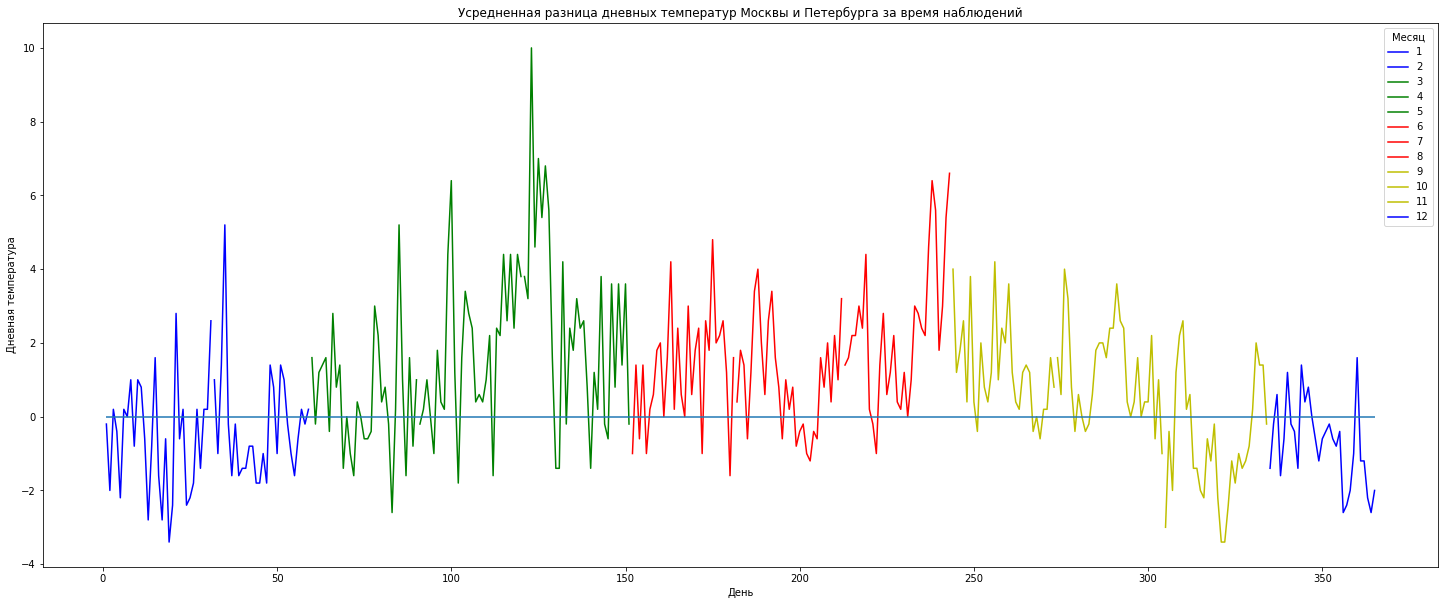

In [320]:
diff = df_moscow_av['Дневная температура'] - df_spb_av['Дневная температура']

figure = plt.figure(figsize=(25, 10))
figure = sns.lineplot(data=df_spb_av, x=df_spb_av.index, y=diff, hue='Месяц', palette=dict_palette)
plt.hlines(y=0, xmin=1, xmax=365)
plt.title('Усредненная разница дневных температур Москвы и Петербурга за время наблюдений')
plt.show()

В Москве теплые времена года в целом теплее, а зимние в целом холоднее. 
Петербург находится у моря, Москва - глубже на континенте; это объясняет такой разброс. 

Однако еще с предыдущего графика меня напрягает то, насколько у нас ломаные линии и высокодисперсные значения. 

Вообще это обусловлено малым количеством наблюдений - рассматриваем всего пять лет.
Но на всякий случай сделаю "проверку на дурака" - посмотрим на день с самым большим разрывом и посчитаем руками показатели, не прибегая к функции average_func, в которой я потенциально мог ошибиться. 

In [310]:
diff[diff == diff.max()]
# вытащили самый "разрывный день"

День
123    10.0
Name: Дневная температура, dtype: float64

In [314]:
dumb = df_moscow['2018': '2022']
dumb18 = dumb.loc['2018'].reset_index().iloc[122, 2] # т.к. нумерация не с нуля, на день меньше 
dumb19 = dumb.loc['2019'].reset_index().iloc[122, 2]
dumb20 = dumb.loc['2020'].reset_index().iloc[122, 2]
dumb21 = dumb.loc['2021'].reset_index().iloc[122, 2]
dumb22 = dumb.loc['2022'].reset_index().iloc[122, 2]
dumb_moscow = (dumb18 + dumb19 + dumb20 + dumb21 + dumb22) / 5
dumb_moscow

In [316]:
dumb = df_spb['2018': '2022']
dumb18 = dumb.loc['2018'].reset_index().iloc[122, 2]
dumb19 = dumb.loc['2019'].reset_index().iloc[122, 2]
dumb20 = dumb.loc['2020'].reset_index().iloc[122, 2]
dumb21 = dumb.loc['2021'].reset_index().iloc[122, 2]
dumb22 = dumb.loc['2022'].reset_index().iloc[122, 2]
dumb_spb = (dumb18 + dumb19 + dumb20 + dumb21 + dumb22) / 5
dumb_spb

7.8

In [317]:
dumb_moscow - dumb_spb == diff[diff == diff.max()]
# результаты сошлись, код написан без ошибок 

День
123    True
Name: Дневная температура, dtype: bool

## 7. Усредненный график давления

Никак не работал с этой переменной, напоследок надо посмотреть и на нее. 

<function matplotlib.pyplot.show(close=None, block=None)>

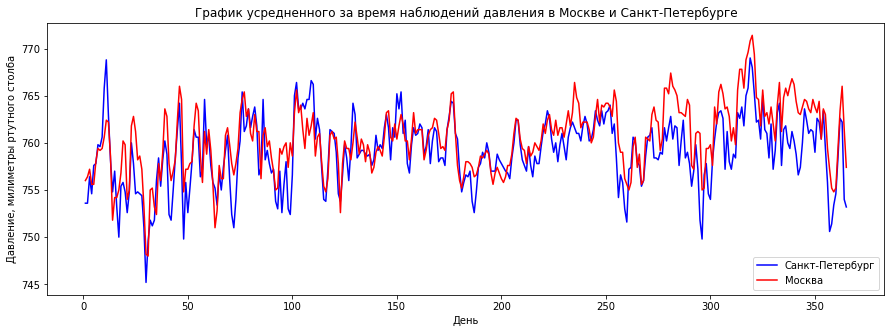

In [336]:
fig = plt.figure(figsize=(15, 5))
ax1 = plt.plot(df_spb_av['Давление'], color='b')
ax2 = plt.plot(df_moscow_av['Давление'], color='r')
plt.title('График усредненного за время наблюдений давления в Москве и Санкт-Петербурге')
plt.xlabel('День')
plt.ylabel('Давление, милиметры ртутного столба')
plt.legend(('Санкт-Петербург', 'Москва'))
plt.show

Здесь тоже можем видеть, что в Москве давление несколько выше, чем в Санкт-Петербурге - можно объяснить все той же континентальностью климата. 

Итого мы посмотрели на все признаки, которые загрузили. Хоть и не радикально, но города все же отличаются: это дает основания думать, что логистическая регрессия сможет осмысленно различать одну столицу и другую. 